# Homework 2: Integration at work

## Physics 177, Spring 2017 (Professor Tanedo)  
## Due Tuesday. April 25

## 1. Simpsons Rule, Again (But not really)

In [32]:
def int(f, a, b, n):
    # this function integrates with trapezoidal rule because why not
    deltax = float(b - a)/n
    lookatallthosechickens = 0.0
    lookatallthosechickens += f(a)/2.0
    for i in range(1, n):
        lookatallthosechickens += f(a + i * deltax)
    lookatallthosechickens += f(b)/2.0
    return deltax * lookatallthosechickens

In [65]:
def f(q):
    return x**3
# I printed the function the first time and got the right answer, when I printed it a second time after completing problem 2
# I got an array, so I then deleted the cell, I need to figure out how to seperate variables properly or use words instead of
# letters

## Reasoning for using trapezoidal rule instead of simpson's rule

Because I still can't get my original simpson's rule function from the last homework to work. I should probably go in for office hours because something this trivial tripping me up is bothering me a lot. I'm going to try again for problem 2, but for now I wanted to try and write the other rule instead because I haven't done it before.

## 2. Diffraction Limit of a Telescope

## A. Coding the Bessel Function

In [55]:
import math
from math import pi as pi
from math import sin as sin
from math import cos as cos



def J(m, x):
    
    # We don't include a, b, or n because those variables are already defined
    a = 0.0
    b = pi
    n = 1000
    
    deltax = float(b - a)/n
    
    def bessy(m, x, o):
        return cos(m * o - x * sin(o))
    
    # Finally figured out how to integrate with simpson's rule
    
    bertha = bessy(m, x, a) + bessy(m, x, b)
    
    for i in range(1, n):
        o = a + i * deltax
        
        if i % 2 == 1:
            bertha += 4 * bessy(m, x, o)
        else:
            bertha += 2 * bessy(m, x, o)
            
    return deltax * 1/3.0 * 1/pi * bertha

## B. Plotting these Bessel Functions

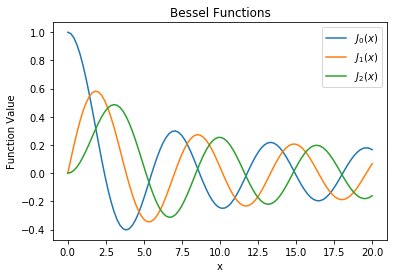

In [59]:
import matplotlib.pyplot as plt
import numpy as np

Jnp = np.vectorize(J)
x = np.linspace(0, 20, 100)



plt.plot(x, Jnp(0, x), label='$J_0(x)$')
plt.plot(x, Jnp(1, x), label='$J_1(x)$')
plt.plot(x, Jnp(2, x), label='$J_2(x)$')

# It took me a whole freaking hour of errors just to realize I needed to write Jnp(i, x) instead of Jnp(J(i, x))
    
plt.xlabel('x')
plt.ylabel('Function Value')
plt.title("Bessel Functions")
plt.legend()
plt.show()

## C. Comparing to Sines

In [62]:
def hella(m, x):
    if x == 0:
        x = 1.0
        return (2/(pi * x))**(1/2.0) * cos(pi - ((2 * m + 1) * pi) / 4)
    else:
        return (2/(pi * x))**(1/2.0) * cos(pi - ((2 * m + 1) * pi) / 4)

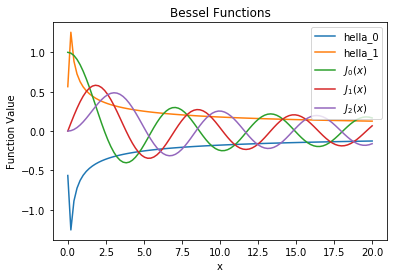

In [75]:
Jnp = np.vectorize(J)
hellanp = np.vectorize(hella)
x = np.linspace(0, 20, 100)


plt.plot(x, hellanp(0, x), label='hella_0')
plt.plot(x, hellanp(1, x), label='hella_1')
plt.plot(x, Jnp(0, x), label='$J_0(x)$')
plt.plot(x, Jnp(1, x), label='$J_1(x)$')
plt.plot(x, Jnp(2, x), label='$J_2(x)$')

# HELLA GRAPHED
    
plt.xlabel('x')
plt.ylabel('Function Value')
plt.title("Bessel Functions")
plt.legend()
plt.show()

## D. Plotting Diffraction Patterns

In [74]:
side = np.linspace(-10, 10, 50)
X,Y = np.meshgrid(side,side)
x = ((2 * pi / (500**-9)) * 1**-6)
Z = (J(1, x) / x)**2
plt.pcolormesh(X,Y,Z, vmax = 0.1)
plt.title("Fettucini")
plt.show()


ValueError: not enough values to unpack (expected 2, got 0)

I dont understand how to include the X and Y into the Z function, it says to use I(r) for Z but I don't know where the labels for X and Y fit into it

## 3. Gaussian Quadrature

I don't know how to import the gausswx to a clean notebook so in order to continue I'll need to copy/paste the entire code from the gausswx file

In [76]:
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [89]:
N = 5
x,w = gaussxw(N)
gaussxw(5)
xaxis = np.array(x)
yaxis = np.array(w)
plt.plot(xaxis, yaxis, '-')


I have no idea what I'm doing. I know that Gaussxw when given an N will output an x and w defined within its function. I don't know how to seperate the two arrays and turn them into plot points for a scatter plot.

## B. Problems 1A and 1B using Guassian Quadrature

This is saying Problem 1 but includes the Bessel function which is not in problem 1 but in problem 2.

As I understand it, the first part of the gaussian quadrature is designed to calcualte the weights and sample sizes, while the second function is designed to actually
be the gaussian integral? I think, Im confused with how to mix variables of the Bessel function which include m,x, and theta or o. while the gaussian function only
needs the number N which is pre defined and some limits of integration.

## 4. Simpson's Rule Error from HW1

oh boy, so I managed to fix the problem from last homework:

In [91]:
def integrator(f, a, b, n):
    # Testing simpson's rule with this configuration seems to work
    
    deltax = float(b-a)/n
    caramel = 0.0
    
    h = float(a)
    for i in range(0, n//2):
        caramel += f(h) + (2.0 * f(h + deltax))
        h += 2 * deltax
    
    caramel = (2.0 * caramel) - f(a) + f(b)
    caramel = deltax * caramel/3.0
    return caramel

In [94]:
def f(x):
    return 4*x**2

integrator(f, 0, 2, 42)

10.666666666666671

I'm just gonna assume that the precision error has to do with the fact that ax^2 ends up with some value over 3. Since 3 doesn't fit nicely into the 2 inverse power compute method, we're always going to get strange precision erros as it tries to get closer and closer the actual answer

In [96]:
def g(y):
    return 42 * y**3

integrator(g, 0, 2, 42)

168.00000000000014

The answer to this problem is 168 (according to mathematica), I don't know why function doesn't compute an exact number. I mean this has to do with the intrgrals taking approximations and not the real integrals but my knowledge stops there.

The error for Simpsons rule is given by $(1/90) * deltax^4(f'''(a) -f'''(b))$ The derivation for this was tedious and I didn't want to do this with code but rather with paper instead.